In [1]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import seaborn as sns

In [76]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 14.9 MB/s 


In [4]:
df_train = pd.read_csv("train.txt", delimiter=';', header=None, names=['sentence','label'])
df_test = pd.read_csv("test.txt", delimiter=';', header=None, names=['sentence','label'])
df_val = pd.read_csv("val.txt", delimiter=';', header=None, names=['sentence','label'])

In [5]:
df_train.head()

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [18]:
df = pd.concat([df_train,df_test,df_val])

In [7]:
df['label'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [19]:
df.head()

,sentence,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [20]:
#changing the column name 1 and 2
df.rename(columns={'sentence' : 'text', 'label':'emotion'}, inplace=True)

In [10]:
df.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [11]:
df.shape

(20000, 2)

In [12]:
#STEPS TO BE DONE TO COMPLETE THE MODEL:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     20000 non-null  object
 1   emotion  20000 non-null  object
dtypes: object(2)
memory usage: 468.8+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [21]:
df['emotion_enc'] = encoder.fit_transform(df['emotion'])

In [22]:
df.sample(5)

,text,emotion,emotion_enc
14903,i do know how you feel if you re little appreh...,fear,1
246,i come home and feel so shitty i cant bring my...,sadness,4
774,i suppose its only natural that id start to fe...,sadness,4
850,i feel embarrassed for not having lost weight ...,sadness,4
11625,i feel helpless about not being able to help h...,fear,1


In [23]:
df[['emotion_enc','emotion']].drop_duplicates(keep='first')

,emotion_enc,emotion
0,4,sadness
2,0,anger
3,3,love
6,5,surprise
7,1,fear
8,2,joy


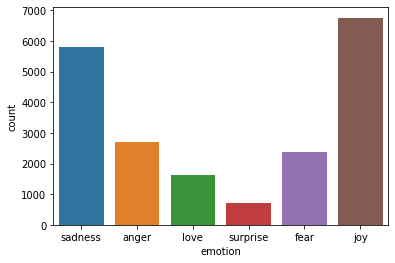

In [24]:
# Plot
sns.countplot(x='emotion',data=df)

In [25]:
#checking missing values
df.isnull().sum()

text           0
emotion        0
emotion_enc    0
dtype: int64

In [26]:
#checking duplicate values
df.duplicated().sum()

1

In [27]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [28]:
#checking duplicate values
df.duplicated().sum()

0

In [29]:
df.shape

(19999, 3)

In [30]:
df['emotion'].value_counts()

joy         6760
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: emotion, dtype: int64

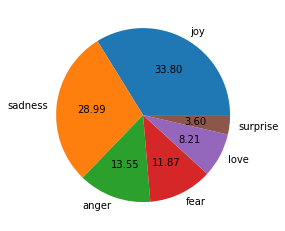

In [31]:
#for representation of counts
import matplotlib.pyplot as plt
plt.pie(df['emotion'].value_counts(), labels=['joy', 'sadness', 'anger', 'fear', 'love', 'surprise'],autopct="%0.2f")
plt.show()

In [32]:
import nltk

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
df['num_characters'] = df['text'].apply(len)

In [35]:
df.head()

,text,emotion,emotion_enc,num_characters
0,i didnt feel humiliated,sadness,4,23
1,i can go from feeling so hopeless to so damned...,sadness,4,108
2,im grabbing a minute to post i feel greedy wrong,anger,0,48
3,i am ever feeling nostalgic about the fireplac...,love,3,92
4,i am feeling grouchy,anger,0,20


In [36]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [37]:
df.head()

,text,emotion,emotion_enc,num_characters,num_words
0,i didnt feel humiliated,sadness,4,23,4
1,i can go from feeling so hopeless to so damned...,sadness,4,108,21
2,im grabbing a minute to post i feel greedy wrong,anger,0,48,10
3,i am ever feeling nostalgic about the fireplac...,love,3,92,18
4,i am feeling grouchy,anger,0,20,4


In [38]:
#num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [39]:
df.head()

,text,emotion,emotion_enc,num_characters,num_words,num_sentences
0,i didnt feel humiliated,sadness,4,23,4,1
1,i can go from feeling so hopeless to so damned...,sadness,4,108,21,1
2,im grabbing a minute to post i feel greedy wrong,anger,0,48,10,1
3,i am ever feeling nostalgic about the fireplac...,love,3,92,18,1
4,i am feeling grouchy,anger,0,20,4,1


In [40]:
df.drop(columns=['num_sentences'], inplace=True)

In [41]:
df.head()

,text,emotion,emotion_enc,num_characters,num_words
0,i didnt feel humiliated,sadness,4,23,4
1,i can go from feeling so hopeless to so damned...,sadness,4,108,21
2,im grabbing a minute to post i feel greedy wrong,anger,0,48,10
3,i am ever feeling nostalgic about the fireplac...,love,3,92,18
4,i am feeling grouchy,anger,0,20,4


In [42]:
df[['num_characters','num_words']].describe()

,num_characters,num_words
count,19999.000000,19999.000000
mean,96.671784,19.144407
std,55.778779,10.977636
min,7.000000,2.000000
25%,53.000000,11.000000
50%,86.000000,17.000000
75%,129.000000,25.000000
max,300.000000,66.000000


In [45]:
#separately analyzing ham and spam
# joy
df[df['emotion'] == 'joy'][['num_characters','num_words']].describe()

,num_characters,num_words
count,6760.000000,6760.000000
mean,98.114349,19.436243
std,55.173050,10.830361
min,9.000000,2.000000
25%,55.750000,11.000000
50%,88.000000,18.000000
75%,130.000000,26.000000
max,300.000000,64.000000


In [46]:
df[df['emotion'] == 'sadness'][['num_characters','num_words']].describe()

,num_characters,num_words
count,5797.000000,5797.000000
mean,92.776264,18.421252
std,55.957780,11.028958
min,7.000000,2.000000
25%,49.000000,10.000000
50%,80.000000,16.000000
75%,123.000000,25.000000
max,299.000000,66.000000


In [47]:
df[df['emotion'] == 'anger'][['num_characters','num_words']].describe()

,num_characters,num_words
count,2709.000000,2709.000000
mean,97.047988,19.260613
std,57.041647,11.292702
min,9.000000,2.000000
25%,52.000000,10.000000
50%,86.000000,17.000000
75%,131.000000,26.000000
max,298.000000,62.000000


In [48]:
df[df['emotion'] == 'fear'][['num_characters','num_words']].describe()

,num_characters,num_words
count,2373.000000,2373.000000
mean,95.666667,18.751791
std,55.206783,10.908998
min,9.000000,2.000000
25%,53.000000,10.000000
50%,85.000000,16.000000
75%,126.000000,25.000000
max,296.000000,60.000000


In [49]:
df[df['emotion'] == 'love'][['num_characters','num_words']].describe()

,num_characters,num_words
count,1641.000000,1641.000000
mean,103.778793,20.617307
std,54.915038,10.740102
min,13.000000,3.000000
25%,61.000000,12.000000
50%,94.000000,19.000000
75%,137.000000,27.000000
max,299.000000,63.000000


In [50]:
df[df['emotion'] == 'surprise'][['num_characters','num_words']].describe()

,num_characters,num_words
count,719.000000,719.000000
mean,100.196106,19.727399
std,56.754067,11.039217
min,12.000000,3.000000
25%,57.500000,11.000000
50%,86.000000,17.000000
75%,132.000000,26.000000
max,287.000000,61.000000


In [51]:
#plotting about everything done above(best method to do is seaborn(i prefer seaborn))
import seaborn as sns

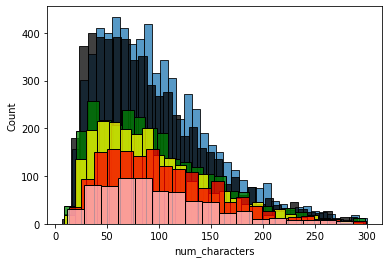

In [55]:
plt.figure()
sns.histplot(df[df['emotion'] == 'joy']['num_characters'])
sns.histplot(df[df['emotion'] == 'sadness']['num_characters'], color = 'black')
sns.histplot(df[df['emotion'] == 'anger']['num_characters'], color = 'green')
sns.histplot(df[df['emotion'] == 'fear']['num_characters'], color = 'yellow')
sns.histplot(df[df['emotion'] == 'love']['num_characters'], color = 'red')
sns.histplot(df[df['emotion'] == 'surprise']['num_characters'], color = 'pink')

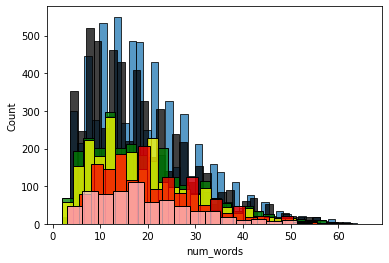

In [56]:
plt.figure()
sns.histplot(df[df['emotion'] == 'joy']['num_words'])
sns.histplot(df[df['emotion'] == 'sadness']['num_words'], color = 'black')
sns.histplot(df[df['emotion'] == 'anger']['num_words'], color = 'green')
sns.histplot(df[df['emotion'] == 'fear']['num_words'], color = 'yellow')
sns.histplot(df[df['emotion'] == 'love']['num_words'], color = 'red')
sns.histplot(df[df['emotion'] == 'surprise']['num_words'], color = 'pink')

In [58]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [60]:
joy_wc = wc.generate(df[df['emotion'] == 'joy']['text'].str.cat(sep=" "))

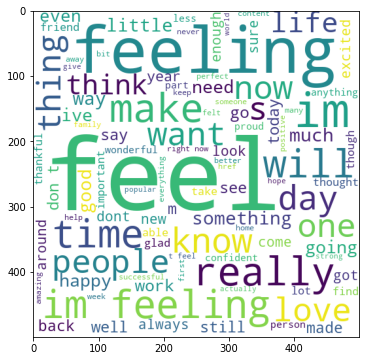

In [61]:
#displaying the joy words
plt.figure(figsize=(15,6))
plt.imshow(joy_wc)

In [62]:
sadness_wc = wc.generate(df[df['emotion'] == 'sadness']['text'].str.cat(sep=" "))

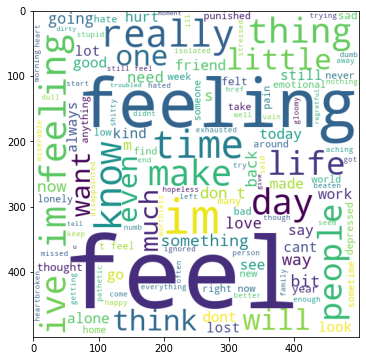

In [63]:
#displaying the sadness words
plt.figure(figsize=(15,6))
plt.imshow(sadness_wc)

In [64]:
anger_wc = wc.generate(df[df['emotion'] == 'anger']['text'].str.cat(sep=" "))

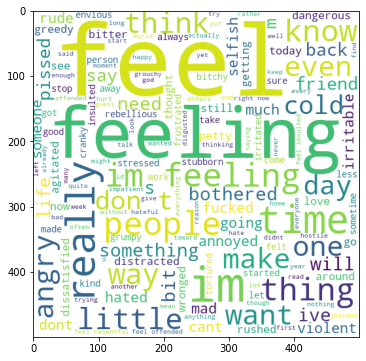

In [65]:
#displaying the anger words
plt.figure(figsize=(15,6))
plt.imshow(anger_wc)

In [66]:
fear_wc = wc.generate(df[df['emotion'] == 'fear']['text'].str.cat(sep=" "))

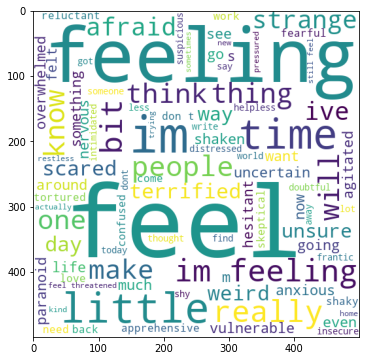

In [67]:
#displaying the fear words
plt.figure(figsize=(15,6))
plt.imshow(fear_wc)

In [68]:
love_wc = wc.generate(df[df['emotion'] == 'love']['text'].str.cat(sep=" "))

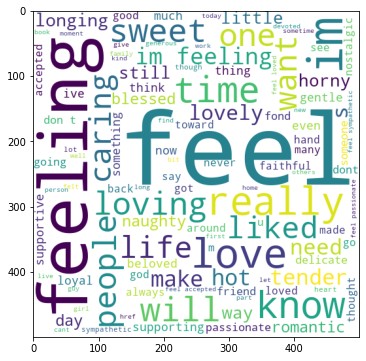

In [69]:
#displaying the love words
plt.figure(figsize=(15,6))
plt.imshow(love_wc)

In [70]:
surprise_wc = wc.generate(df[df['emotion'] == 'surprise']['text'].str.cat(sep=" "))

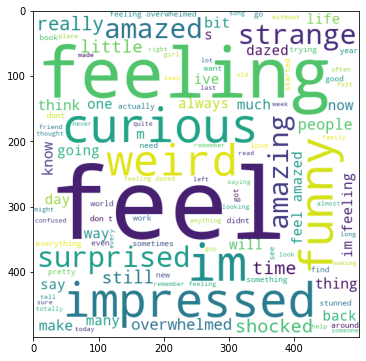

In [71]:
#displaying the surprise words
plt.figure(figsize=(15,6))
plt.imshow(surprise_wc)

In [73]:
df.head()

,text,emotion,emotion_enc,num_characters,num_words
0,i didnt feel humiliated,sadness,4,23,4
1,i can go from feeling so hopeless to so damned...,sadness,4,108,21
2,im grabbing a minute to post i feel greedy wrong,anger,0,48,10
3,i am ever feeling nostalgic about the fireplac...,love,3,92,18
4,i am feeling grouchy,anger,0,20,4


In [74]:
# Features & Labels
Xfeatures = df['text']
ylabels = df['emotion']

In [77]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [78]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [79]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [80]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [81]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [82]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.8873333333333333

In [89]:
# Make A Prediction
ex1 = "She is very kind."


In [90]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [91]:
#Predicition prob
pipe_lr.predict_proba([ex1])

array([[0.20363865, 0.15421974, 0.33983939, 0.03772819, 0.25452026,
        0.01005376]])

In [92]:
# To Know the classes
#All the classes present
pipe_lr.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [93]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()